<a href="https://colab.research.google.com/github/pcholanda73/PMNS---diagonalization/blob/main/PMNS_diagonalization_in_matter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# by Marcos and Pedro
# 2021

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.interpolate import interp1d
import math
from sympy import *
import scipy.linalg as la
import statistics as st
from scipy.integrate import simps


In [ ]:
#Energy in eV and rho in g cm^-3

def Matter_parameters(E, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23):
  c12=np.cos(theta_12)
  s12=np.sin(theta_12)
  c13=np.cos(theta_13)
  s13=np.sin(theta_13)
  c23=np.cos(theta_23)
  s23=np.sin(theta_23)
  U23 = np.array([ [1,0,0],[0,c23,s23],[0,-s23,c23] ])
  U13 = np.array([ [c13,0,s13],[0,1,0],[-s13,0,c13] ])
  U12 = np.array([ [c12,s12,0],[-s12,c12,0],[0,0,1] ])
  U3 = U23 @ U13 @ U12
  U3_dag = np.transpose(U3)

  #Re-evaluating the M2 with the E parameter for the function
  M2 = np.array([[0,0,0],[0,Deltam_21/2./E,0],[0,0,Deltam_31/2./E]])

  #Hamiltonian in flavour basis
  H = U3 @ M2 @ U3_dag

  #Potential in matter
  vcc = np.array([[vcc0,0.,0.],[0.,0.,0.],[0.,0.,0.]])

  #Hamiltonian in flavor basis in matter
  Hmat = H + vcc

  #eigenvalues
  eigvals, eigvecs = la.eig(Hmat)
  eigvals = eigvals.real

  #sorting eigenvalues list
  id_sor = np.argsort(eigvals)

  #adding eigenvaues to a list
  eval1 = eigvals[id_sor[0]]
  eval2 = eigvals[id_sor[1]]
  eval3 = eigvals[id_sor[2]]

  #collecting eigenvectors from sorted eigenvalues
  eve1 = eigvecs[:,id_sor[0]]
  eve2 = eigvecs[:,id_sor[1]]
  eve3 = eigvecs[:,id_sor[2]]

  #Eigenvector for electron neutrino spectrum
  Ue1 = abs(eve1[0])
  Ue2 = abs(eve2[0])
  Ue3 = abs(eve3[0])
  #Eigenvector for muon neutrino spectrum
  Umu1 = abs(eve1[1])
  Umu2 = abs(eve2[1])
  Umu3 = abs(eve3[1])
  
  #Lists with Uei and eigenvalues to be returned
  Ue = [Ue1, Ue2, Ue3]
  Umu = [Umu1, Umu2, Umu3]
  m_eva = [eval1, eval2, eval3]

  return Ue, Umu, m_eva

#Enu=10.
#Ue = Matter_parameters(Enu*j/10, 0.5, rho)[0]



In [ ]:
Deltam_21=8.e-5
Deltam_31=2.5e-3
theta_12=0.59
theta_13 = 0.148
theta_23= 0.738

rho=3.#1.#2.#3.
Gf = 1.16632  #10^{-23} suppressed
Na = 6.022    #10^{+23} suppressed
Yp=0.5
vcc0 = np.sqrt(2.)*Yp*rho*Gf*Na/((5.068e4)**3)
print(vcc0)

c_13=np.cos(theta_13)
s_13=np.sin(theta_13)
c_2t13=np.cos(2.*theta_13)
s_2t13=np.sin(2.*theta_13)
c_2t12=np.cos(2.*theta_12)
s_2t12=np.sin(2.*theta_12)
s_23=np.sin(theta_23)
s2_t23=s_23**2.


1.144603085715975e-13


Ressonância na escala solar:
$$
E = \Delta m^2_{21}\cos 2\theta_{12}/(2 V_{CC}) = 266\,{\rm MeV}
$$

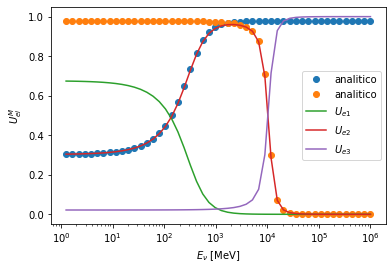

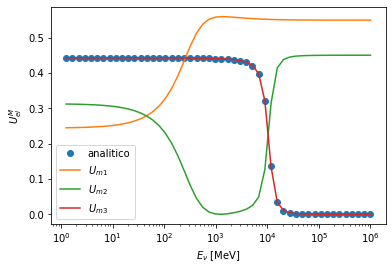

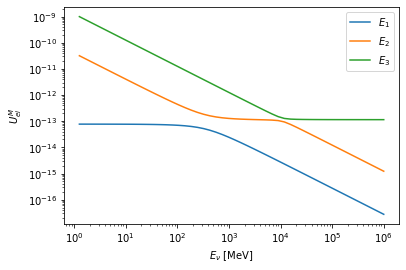

In [ ]:
# testando:
Ue1 = []
Ue2 = []
Ue3 = []
Um1 = []
Um2 = []
Um3 = []
m1m = []
m2m = []
m3m = []
delm21 = []
delm32 = []
#enu_list = np.linspace(10, 200, num=2000, endpoint=True) #energy in MeV
enu_list = np.linspace(.1, 6, num=50, endpoint=True) #energy in MeV
enu_list = 10.**enu_list

# analytical
deltE=Deltam_21/(4.e6*enu_list)
deltE_m_l = +np.sqrt((-deltE*c_2t12+vcc0/2.)**2 + (deltE*s_2t12)**2)
c_2t12m_l=(+deltE*c_2t12-vcc0/2.)/deltE_m_l
c_12m_l=np.sqrt((1+c_2t12m_l)/2)
s_12m_l=np.sqrt((1-c_2t12m_l)/2)
c2_12m_l=c_12m_l**2
s2_12m_l=s_12m_l**2

deltE=Deltam_31/(4.e6*enu_list)

deltE_m_h = +np.sqrt((-deltE*c_2t13+vcc0/2.)**2 + (deltE*s_2t13)**2)
c_2t13m_h=(+deltE*c_2t13-vcc0/2.)/deltE_m_h
c_13m_h=np.sqrt((1+c_2t13m_h)/2)
s_13m_h=np.sqrt((1-c_2t13m_h)/2)
c2_13m_h=c_13m_h**2
s2_13m_h=s_13m_h**2

deltE_m_h_IH = -np.sqrt((+deltE*c_2t13+vcc0/2.)**2 + (deltE*s_2t13)**2)
c_2t13m_h_IH=(-deltE*c_2t13-vcc0/2.)/deltE_m_h_IH
c_13m_h_IH=np.sqrt((1+c_2t13m_h_IH)/2)
s_13m_h_IH=np.sqrt((1-c_2t13m_h_IH)/2)
c2_13m_h_IH=c_13m_h**2
s2_13m_h_IH=s_13m_h**2



# numerical:
for i in range(len(enu_list)):
  Enu=enu_list[i]
  Ue = Matter_parameters(Enu*1.e6, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23)[0]
  Um = Matter_parameters(Enu*1.e6, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23)[1]
  evm = Matter_parameters(Enu*1.e6, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23)[2]
  Ue1.append(Ue[0]**2)
  Ue2.append(Ue[1]**2)
  Ue3.append(Ue[2]**2)
  Um1.append(Um[0]**2)
  Um2.append(Um[1]**2)
  Um3.append(Um[2]**2)
  m1m.append(evm[0])
  m2m.append(evm[1])
  m3m.append(evm[2])
  delm21.append((m2m[i]-m1m[i])/2)
  delm32.append((m3m[i]-m2m[i])/2)

plt.plot(enu_list,c_13**2.*s2_12m_l, 'o',label = 'analitico')
plt.plot(enu_list,c2_13m_h, 'o',label = 'analitico')
plt.plot(enu_list, Ue1, label = '$U_{e1} %d MeV$')
plt.plot(enu_list, Ue2, label = '$U_{e2} %d MeV$')
plt.plot(enu_list, Ue3, label = '$U_{e3} %d MeV$')
plt.xlabel(r"$E_\nu$ [MeV]")
plt.ylabel(r"$U^M_{ei}$")
plt.xscale("log")
#plt.legend(bbox_to_anchor=(0.11,.42))
plt.legend()
plt.show()

plt.plot(enu_list,s_23**2.*c2_13m_h, 'o',label = 'analitico')
plt.plot(enu_list, Um1, label = '$U_{m1} %d MeV$')
plt.plot(enu_list, Um2, label = '$U_{m2} %d MeV$')
plt.plot(enu_list, Um3, label = '$U_{m3} %d MeV$')
#plt.plot(enu_list,c_13**2.*s2_12m_l, label = 'analitico')
plt.xlabel(r"$E_\nu$ [MeV]")
plt.ylabel(r"$U^M_{ei}$")
plt.xscale("log")
#plt.legend(bbox_to_anchor=(0.11,.42))
plt.legend()
plt.show()

plt.plot(enu_list, m1m, label = '$E_{1} %d eV^2$')
plt.plot(enu_list, m2m, label = '$E_{2} %d eV^2$')
plt.plot(enu_list, m3m, label = '$E_{3} %d eV^2$')
#plt.plot(enu_list, deltE_m_l, 'o',label = 'analitico')
#plt.plot(enu_list, deltE_m_h, 'o',label = 'analitico')
#plt.plot(enu_list, delm21, label = '$\delta_{21} %d eV^2$')
#plt.plot(enu_list, delm32, label = '$\delta_{32} %d eV^2$')
plt.xlabel(r"$E_\nu$ [MeV]")
plt.ylabel(r"$U^M_{ei}$")
plt.xscale("log")
plt.yscale("log")
#plt.legend(bbox_to_anchor=(0.11,.42))
plt.legend()
plt.show()


[ 0.94756583  0.94657427  0.94555513  0.94450739  0.94343     0.94232189
  0.94118189  0.94000883  0.93880145  0.93755844  0.93627845  0.93496004
  0.93360171  0.93220191  0.93075899  0.92927123  0.92773683  0.92615391
  0.92452049  0.92283448  0.9210937   0.91929588  0.91743861  0.91551937
  0.91353551  0.91148424  0.90936263  0.90716762  0.90489596  0.90254425
  0.9001089   0.89758615  0.89497202  0.89226234  0.8894527   0.88653845
  0.88351473  0.88037636  0.87711792  0.87373369  0.87021763  0.86656338
  0.86276423  0.8588131   0.85470252  0.85042464  0.84597115  0.8413333
  0.83650188  0.83146718  0.82621894  0.82074639  0.81503819  0.80908238
  0.80286641  0.79637709  0.78960056  0.78252228  0.77512702  0.76739885
  0.7593211   0.7508764   0.74204664  0.73281301  0.72315599  0.71305542
  0.70249048  0.69143981  0.67988153  0.66779337  0.65515274  0.64193691
  0.62812313  0.61368885  0.59861192  0.58287085  0.5664451   0.5493154
  0.5314641   0.51287557  0.49353661  0.47343691  0.4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt


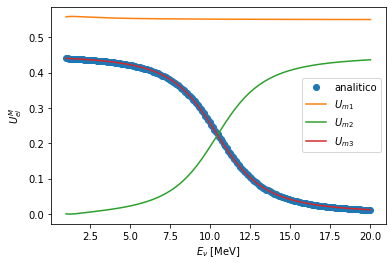

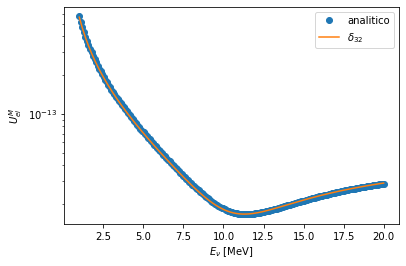

In [ ]:
# DUNE:
L= 1300*5.058e9
Ue1 = []
Ue2 = []
Ue3 = []
Um1 = []
Um2 = []
Um3 = []
m1m = []
m2m = []
m3m = []
delm21 = []
delm32 = []

enu_list = np.linspace(1, 20, num=200, endpoint=True) #energy in GeV

# analytical
deltE=Deltam_31/(4.e9*enu_list)

deltE_m_h = +np.sqrt((-deltE*c_2t13+vcc0/2.)**2 + (deltE*s_2t13)**2)
c_2t13m_h=(+deltE*c_2t13-vcc0/2.)/deltE_m_h
c_13m_h=np.sqrt((1+c_2t13m_h)/2)
s_13m_h=np.sqrt((1-c_2t13m_h)/2)
c2_13m_h=c_13m_h**2
s2_13m_h=s_13m_h**2

deltE_m_h_IH = -np.sqrt((+deltE*c_2t13+vcc0/2.)**2 + (deltE*s_2t13)**2)
c_2t13m_h_IH=(-deltE*c_2t13-vcc0/2.)/deltE_m_h
print(c_2t13m_h)
c_13m_h_IH=np.sqrt((1+c_2t13m_h_IH)/2)
s_13m_h_IH=np.sqrt((1-c_2t13m_h_IH)/2)
c2_13m_h_IH=c_13m_h_IH**2
s2_13m_h_IH=s_13m_h_IH**2

# numerical:
for i in range(len(enu_list)):
  Enu=enu_list[i]
  Ue = Matter_parameters(Enu*1.e9, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23)[0]
  Um = Matter_parameters(Enu*1.e9, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23)[1]
  evm = Matter_parameters(Enu*1.e9, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23)[2]
  Ue1.append(Ue[0]**2)
  Ue2.append(Ue[1]**2)
  Ue3.append(Ue[2]**2)
  Um1.append(Um[0]**2)
  Um2.append(Um[1]**2)
  Um3.append(Um[2]**2)
  m1m.append(evm[0])
  m2m.append(evm[1])
  m3m.append(evm[2])
  delm21.append((m2m[i]-m1m[i])/2)
  delm32.append((m3m[i]-m2m[i])/2)


plt.plot(enu_list,s_23**2.*c2_13m_h, 'o',label = 'analitico')
plt.plot(enu_list, Um1, label = '$U_{m1} %d MeV$')
plt.plot(enu_list, Um2, label = '$U_{m2} %d MeV$')
plt.plot(enu_list, Um3, label = '$U_{m3} %d MeV$')
#plt.plot(enu_list,c_13**2.*s2_12m_l, label = 'analitico')
plt.xlabel(r"$E_\nu$ [MeV]")
plt.ylabel(r"$U^M_{ei}$")
#plt.xscale("log")
#plt.legend(bbox_to_anchor=(0.11,.42))
plt.legend()
plt.show()

#plt.plot(enu_list, m1m, label = '$E_{1} %d eV^2$')
#plt.plot(enu_list, m2m, label = '$E_{2} %d eV^2$')
#plt.plot(enu_list, m3m, label = '$E_{3} %d eV^2$')
plt.plot(enu_list, deltE_m_h, 'o',label = 'analitico')
plt.plot(enu_list, delm32, label = '$\delta_{32} %d eV^2$')
plt.xlabel(r"$E_\nu$ [MeV]")
plt.ylabel(r"$U^M_{ei}$")
#plt.xscale("log")
plt.yscale("log")
#plt.legend(bbox_to_anchor=(0.11,.42))
plt.legend()
plt.show()


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


<function matplotlib.pyplot.show>

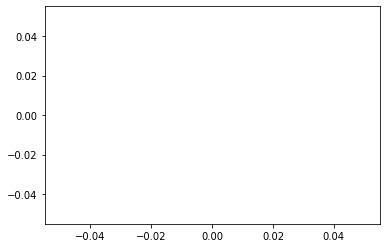

In [ ]:
prob_num = []
prob_analit = []
prob_analit_IH = []
prob_vacuo = []

prob_num=1-4.*np.array(Um3)*(1-np.array(Um3))*(np.sin(np.array(delm32)*L))**2  
prob_analit=1-4.*s2_t23*c2_13m_h*(1-s2_t23*c2_13m_h)*(np.sin(deltE_m_h*L))**2  
prob_analit_IH=1-4.*s2_t23*c2_13m_h_IH*(1-s2_t23*c2_13m_h_IH)*(np.sin(deltE_m_h_IH*L))**2  
prob_vacuo=1-4.*s2_t23*c_13**2*(1-s2_t23*c_13**2)*(np.sin(deltE*L))**2  

print(prob_analit_IH)
#plt.plot(enu_list, prob_num, 'o',label = 'numerico')
#plt.plot(enu_list, prob_analit, label = 'analytical')
plt.plot(enu_list, prob_analit_IH, 'o' , label = 'IH')
#plt.plot(enu_list, prob_vacuo, label = 'vacuo')
plt.show

E, finalmente, a probabilidade:

Probabilidade completa:

\begin{eqnarray*}
P(\nu_\alpha\nu_\beta)&=&\delta_{\alpha\beta}
-2\sum_{j>k}Re(U_{\beta j}U^*_{\alpha j}U_{\alpha k}U^*_{\beta k})\left(1-\cos\left(\frac{\Delta_{jk}}{2E}x\right)\right)\\
&&+2\sum_{j>k}Im(U_{\beta j}U^*_{\alpha j}U_{\alpha k}U^*_{\beta k})\sin\left(\frac{\Delta_{jk}}{2E}x\right)
\end{eqnarray*}

Probabilidade de sobrevivência de $\nu_\mu$ com $U$ real, ou seja, sem violação CP:
\begin{equation*}
  P(\nu_\mu\nu_\mu)=1-4|U_{\mu 1}|^2|U_{\mu 2}|^2\sin^2\left(\frac{\Delta_{21}}{4E}x\right)-4|U_{\mu 1}|^2|U_{\mu 3}|^2\sin^2\left(\frac{\Delta_{31}}{4E}x\right)-4|U_{\mu 2}|^2|U_{\mu 3}|^2\sin^2\left(\frac{\Delta_{32}}{4E}x\right)
\end{equation*}

Na aproximação $\Delta_{21}=0$:
\begin{equation*}
  P(\nu_\mu\nu_\mu)=1-4|U_{\mu 3}|^2(1-|U_{\mu 3}|^2)\sin^2\left(\frac{\Delta_{31}}{4E}x\right)=1-4\cos^2\theta_{13}\sin^2\theta_{23}(1-\cos^2\theta_{13}\sin^2\theta_{23})\sin^2\left(\frac{\Delta_{31}}{4E}x\right)
\end{equation*}
Reescrevendo:
\begin{eqnarray*}
  P(\nu_\mu\nu_\mu)&=&1-4\cos^2\theta_{13}\sin^2\theta_{23}(1-(1-\sin^2\theta_{13})\sin^2\theta_{23})\sin^2\left(\frac{\Delta_{31}}{4E}x\right) \\
&=&1-(\cos^2\theta_{13}\sin^22\theta_{23}-\sin^22\theta_{13}\sin^2\theta_{23})\sin^2\left(\frac{\Delta_{31}}{4E}x\right)
\end{eqnarray*}

Probabilidade de aparecimento:
\begin{equation*}
  P(\nu_\mu\nu_e)=-4(U_{e1}U^*_{e3}U^*_{\mu 1}U_{\mu 3}+U_{e2}U^*_{e3}U^*_{\mu 2}U_{\mu 3})\sin^2\left(\frac{\Delta_{31}}{4E}x\right)
\end{equation*}


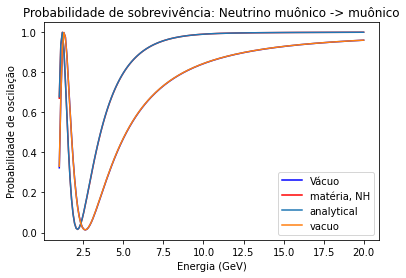

In [ ]:
l = 1300
enu_list = np.linspace(1, 20, num=200, endpoint=True) #energy in GeV
deltE=Deltam_31/(4.e9*enu_list)
#prob_uu = 1-c_13**2.*(s_2t23)**2*(np.sin((deltE*l*5.068e9/2)))**2
prob_uu = 1-4.*c_13**2.*s2_t23*(1.-c_13**2.*s2_t23)*(np.sin((deltE*l*5.068e9)))**2

deltE_m_h = +np.sqrt((-deltE*c_2t13+vcc0/2.)**2 + (deltE*s_2t13)**2)
s_2t13m_h=+deltE*s_2t13/deltE_m_h
c_2t13m_h=(+deltE*c_2t13-vcc0/2.)/deltE_m_h
c_13m_h=np.sqrt((1+c_2t13m_h)/2)
s_13m_h=np.sqrt((1-c_2t13m_h)/2)
c2_13m_h=c_13m_h**2
s2_13m_h=s_13m_h**2
s2_mm = c_13m_h**2.*s2_t23
c2_mm = 1.-s2_mm
s2_2mm=4.*s2_mm*c2_mm
prob_un = 1-s2_2mm*(np.sin((deltE_m_h*l*5.068e9)))**2

deltE_m_h = +np.sqrt((+deltE*c_2t13+vcc0/2.)**2 + (deltE*s_2t13)**2)
s_2t13m_h=+deltE*s_2t13/deltE_m_h
c_2t13m_h=(+deltE*c_2t13+vcc0/2.)/deltE_m_h
c_13m_h=np.sqrt((1+c_2t13m_h)/2)
s_13m_h=np.sqrt((1-c_2t13m_h)/2)
c2_13m_h=c_13m_h**2
s2_13m_h=s_13m_h**2
s2_mm = c_13m_h**2.*s2_t23
c2_mm = 1.-s2_mm
s2_2mm=4.*s2_mm*c2_mm
prob_ui = 1-s2_2mm*(np.sin((deltE_m_h*l*5.068e9)))**2

#tmp1=(np.sin((deltE_m_h*l*5.068e9)))**2
#tmp2=s_2t13m_h**2.
#tmp3=tmp1*tmp2
#plt.plot(enu_list,tmp1,label="1")
#plt.plot(enu_list,tmp2,label="2")
#plt.plot(enu_list,tmp3,label="3")
#plt.legend()

plt.xlabel("Energia (GeV)")
plt.ylabel("Probabilidade de oscilação")
plt.plot(enu_list,prob_uu, "b",label ="Vácuo")
plt.plot(enu_list,prob_un, "r",label ="matéria, NH")
#plt.plot(enu_list,prob_ui, "g",label ="matéria, IH")
plt.plot(enu_list, prob_analit, label = 'analytical')
plt.plot(enu_list, prob_vacuo, label = 'vacuo')
plt.legend()
plt.title("Probabilidade de sobrevivência: Neutrino muônico -> muônico")
plt.show()
